# Adaboost


## Imports


In [37]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
%autoreload 2

In [39]:
from util import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix ,f1_score
from sklearn.linear_model import LogisticRegression

NUM_FOLDS = 10


## Reading the data


In [40]:
X, y = get_train_data(path='../data/train.csv')

In [41]:
# standardize the data
X = standardize_features(X)

In [42]:
X.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the model


The `AdaBoostClassifier` in scikit-learn is an implementation of the AdaBoost (Adaptive Boosting) ensemble learning method for classification tasks. Here are the parameters you can typically use:

1. **n_estimators**: The maximum number of estimators at which boosting is terminated. In other words, the number of boosting rounds (or weak learners) to train. Default is 50.

2. **learning_rate**: The shrinkage parameter that controls the contribution of each classifier. Lower values require more estimators. Default is 1.0.

3. **algorithm**: The algorithm to use for the boosting process. It can be either 'SAMME' or 'SAMME.R'. 'SAMME.R' is the default and usually performs better.

4. **random_state**: Controls the random seed given at each base_estimator at each boosting iteration. This ensures reproducibility of results.

5. **base_estimator_params**: Additional parameters to pass to the base estimator during initialization.

6. **n_jobs**: The number of jobs to run in parallel for both `fit` and `predict`. -1 means using all processors.

These are the main parameters for the `AdaBoostClassifier`. You can find more details and additional parameters in the scikit-learn documentation.


In [24]:
adaboost_clf = AdaBoostClassifier(n_estimators=10, learning_rate=0.1,random_state=42)
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=10, random_state=42)

`cross_validate` function in scikit-learn is used for evaluating estimator performance using cross-validation. It takes several parameters to customize its behavior. Here are the main parameters:

1. **estimator**: This is the machine learning estimator (model) that you want to evaluate.

2. **X**: The feature matrix (data) to fit the model on.

3. **y**: The target values (labels) corresponding to X.

4. **cv**: The cross-validation strategy. It could be an integer specifying the number of folds in a KFold, a cross-validation splitter, or an iterable yielding train/test splits.

5. **scoring**: A single string or a callable to evaluate the predictions on the test set. For example, `'accuracy'`, `'precision'`, `'recall'`, `'f1'`, etc.

6. **n_jobs**: The number of CPU cores to use for computation. `-1` means using all processors.

7. **return_train_score**: Whether to include training scores in the output. Default is `False`.

8. **return_estimator**: Whether to return the fitted estimators for each split. Default is `False`.

9. **verbose**: Controls the verbosity: the higher, the more messages.

10. **fit_params**: Parameters to pass to the `fit` method of the estimator.

11. **pre_dispatch**: Controls the number of jobs dispatched during parallel execution. `-1` means all processes are dispatched at once, `2` means that two processes are dispatched, and `None` means that as many processes as CPUs are used.

These are the main parameters, but there are a few more which you can find in the scikit-learn documentation for the `cross_validate` function.


In [25]:
cv_results = cross_validate(adaboost_clf, X_train, y_train, cv=NUM_FOLDS, scoring=[
                            'f1_macro', 'accuracy', 'f1_micro', 'f1_weighted'])

print('accuracy: ', cv_results['test_accuracy'].mean())
print('f1_macro: ', cv_results['test_f1_macro'].mean())
print('f1_micro: ', cv_results['test_f1_micro'].mean())

accuracy:  0.90195
f1_macro:  0.47422381964761345
f1_micro:  0.90195


In [26]:
# Make predictions
adaboost_prediction = adaboost_clf.predict(X_test)

adaboost_accuracy = accuracy_score(y_test, adaboost_prediction)
print("AdaBoost Accuracy:", adaboost_accuracy)

print("Classification Report:")
print(classification_report(y_test, adaboost_prediction))

AdaBoost Accuracy: 0.899
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      4495
           1       0.00      0.00      0.00       505

    accuracy                           0.90      5000
   macro avg       0.45      0.50      0.47      5000
weighted avg       0.81      0.90      0.85      5000



c:\Users\peter\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\peter\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\peter\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model Analysis


### Feature Importance Plot

A feature importance plot shows the importance of each feature in the model. It can be used to identify the most important features and to understand the impact of each feature on the model's predictions.


In [27]:
# Print out some useful information
print("Feature Importance:", adaboost_clf.feature_importances_)
print("Estimator Weights:", adaboost_clf.estimator_weights_)
print("Estimator Errors:", adaboost_clf.estimator_errors_)
print("Estimators:", adaboost_clf.estimators_)
print("Classes:", adaboost_clf.classes_)
print("n_classes:", adaboost_clf.n_classes_)
print("Base Estimator:", adaboost_clf.base_estimator_)
print("Get adaboost parameters:", adaboost_clf.get_params())

Feature Importance: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.1
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.3 0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.  0.  0.  0.
 0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0. ]
Estimator Weights: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Estimator Errors: [0.09805    0.11946109 0.14207787 0.16540014 0.18892338 0.2122064
 0.23490354 0.25675122 0.27751536 0.297080

c:\Users\peter\miniconda3\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


The weight of the coefficients in the logistic regression model can be used as a measure of feature importance. The higher the absolute value of the coefficient, the more important the feature is in the model. We can plot the coefficients to visualize the feature importance.
Notice that we take the absolute value of the coefficients to consider both positive and negative impacts of the features on the model's predictions.


Feature Importance:      feature  importance
0      var_0         0.0
1      var_1         0.0
2      var_2         0.0
3      var_3         0.0
4      var_4         0.0
..       ...         ...
195  var_195         0.0
196  var_196         0.0
197  var_197         0.0
198  var_198         0.0
199  var_199         0.0

[200 rows x 2 columns]


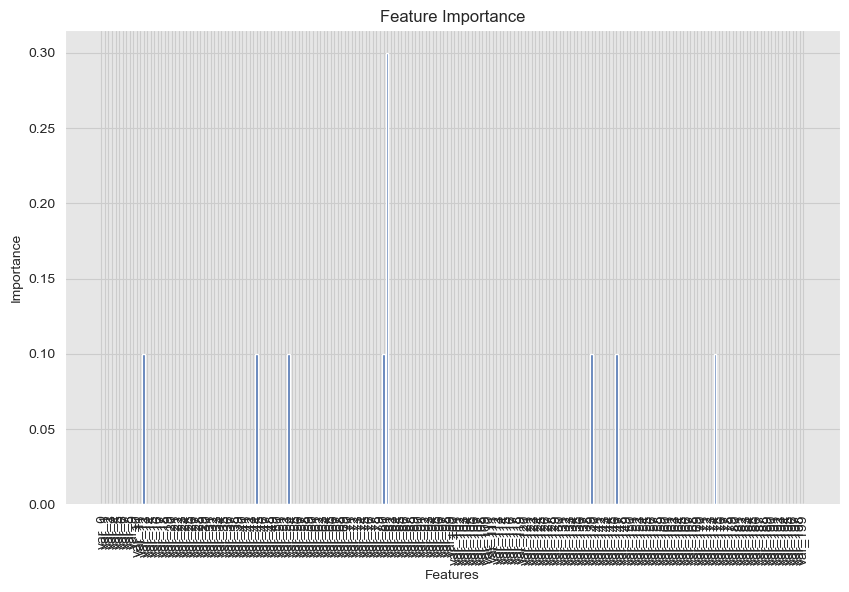

In [28]:
# Get the feature importance
get_feature_importance = adaboost_clf.feature_importances_
# convert this numpy array to a pandas DataFrame
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': get_feature_importance})
print("Feature Importance:", feature_importance)
plt = get_feature_importance_plot(
    feature_importance, modelname='AdaBoost')
plt.show()


Remove unnecessary features and retrain the model to see if the performance improves.

In [29]:
X_train_temp = X_train.copy()
X_test_temp = X_test.copy()

In [30]:
# loop over feature_importance and print out the features with importance > 0.1
for i in range(len(feature_importance)):
    if feature_importance['importance'][i] ==0:
        # remove the feature from the training data that has importance < 0.1
        X_train_temp = X_train_temp.drop(
            columns=feature_importance['feature'][i])
        X_test_temp = X_test_temp.drop(
            columns=feature_importance['feature'][i])
        
print(len(X_train_temp.columns))
print(len(X_test_temp.columns))

8
8


In [31]:
adaboost_clf_temp = AdaBoostClassifier(n_estimators=10, learning_rate=0.1,random_state=42)
adaboost_clf_temp.fit(X_train_temp, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=10, random_state=42)

In [32]:
cv_results = cross_validate(adaboost_clf_temp, X_train_temp, y_train, cv=NUM_FOLDS, scoring=[
                            'f1_macro', 'accuracy', 'f1_micro', 'f1_weighted'])

print('accuracy: ', cv_results['test_accuracy'].mean())
print('f1_macro: ', cv_results['test_f1_macro'].mean())
print('f1_micro: ', cv_results['test_f1_micro'].mean())

accuracy:  0.90195
f1_macro:  0.47422381964761345
f1_micro:  0.90195


In [33]:
# Make predictions
adaboost_prediction = adaboost_clf_temp.predict(X_test_temp)

adaboost_accuracy = accuracy_score(y_test, adaboost_prediction)
print("AdaBoost Accuracy:", adaboost_accuracy)

print("Classification Report:")
print(classification_report(y_test, adaboost_prediction))

AdaBoost Accuracy: 0.899
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      4495
           1       0.00      0.00      0.00       505

    accuracy                           0.90      5000
   macro avg       0.45      0.50      0.47      5000
weighted avg       0.81      0.90      0.85      5000



c:\Users\peter\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\peter\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\peter\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Feature Importance:    feature  importance
0   var_12         0.1
1   var_44         0.1
2   var_53         0.1
3   var_80         0.1
4   var_81         0.3
5  var_139         0.1
6  var_146         0.1
7  var_174         0.1


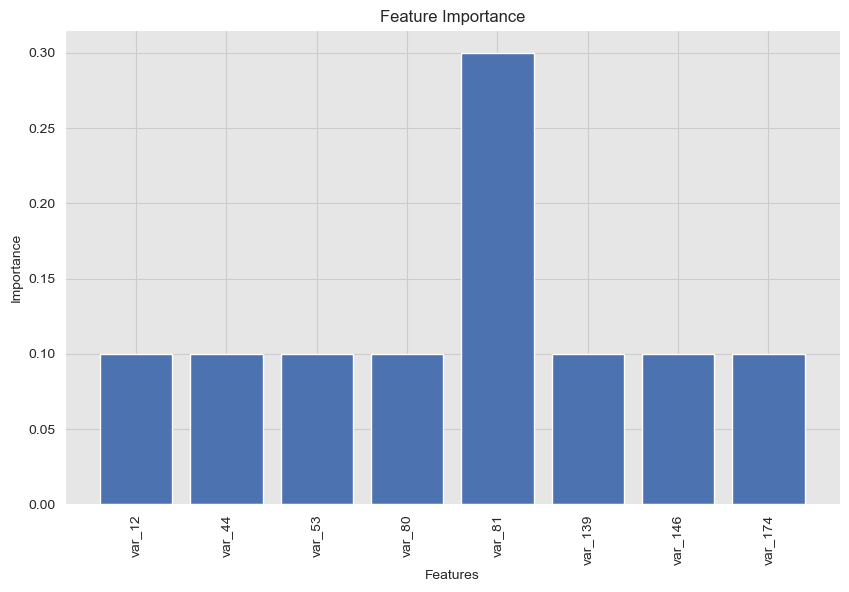

In [34]:
# Get the feature importance
get_feature_importance = adaboost_clf_temp.feature_importances_
# convert this numpy array to a pandas DataFrame
feature_importance = pd.DataFrame({'feature': X_train_temp.columns, 'importance': get_feature_importance})
print("Feature Importance:", feature_importance)
plt = get_feature_importance_plot(
    feature_importance, modelname='AdaBoost',save=False)
plt.show()


### Learning Curves Plot

show the training error (Ein) and validation error (Eval) as a function of the training set size

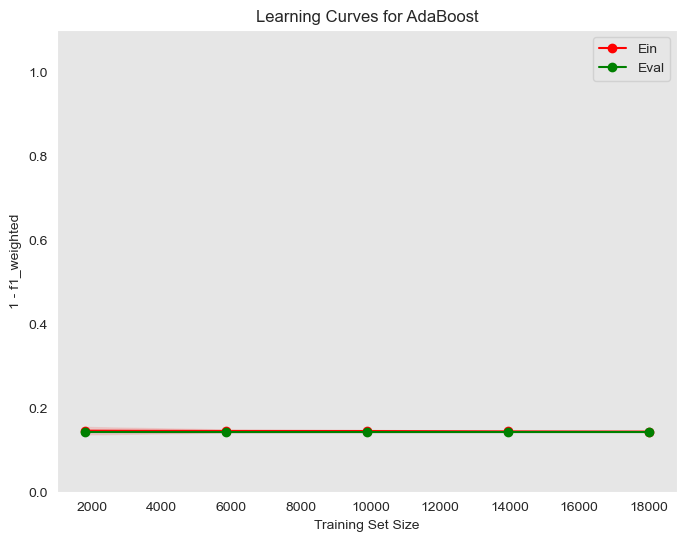

In [35]:
plt = get_learning_curve_plot(estimator=AdaBoostClassifier(n_estimators=10, learning_rate=0.1, random_state=42), X=X_train, y=y_train, cv=NUM_FOLDS, modelname='AdaBoost',save=True)
plt.show()


### Partial Dependence Plot

A partial dependence plot shows the relationship between a feature and the model's predictions while holding all other features constant. It can be used to understand the impact of a single feature on the model's predictions i.e. PDPs show the average effect on predictions as the value of feature changes.

From the plots, we may see the type of the relationship between a feature and a prediction. Some relationships may look linear whereas other are more complex.


In [36]:
plt = get_partial_dependencies_plot(adaboost_clf, X_train, modelname='AdaBoost', save=True)
plt.show()


c:\Users\peter\miniconda3\Lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])
c:\Users\peter\miniconda3\Lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])
c:\Users\peter\miniconda3\Lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])
c:\Users\peter\miniconda3\Lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])
c:\Users\peter\m

ValueError: Image size of 4500x120600 pixels is too large. It must be less than 2^16 in each direction.

## Hyperparameter Tuning

This is a process of adjusting the parameters of a model to optimize its performance. It can be done using techniques like grid search, random search, or Bayesian optimization.


Scores: [0.85474336 0.85492482 0.85434006 0.85431564 0.85437231 0.85500819
 0.85499006 0.85413433 0.85520435 0.85378899]
Scores: [0.85457485 0.8542544  0.85380302 0.85352476 0.85353314 0.85530243
 0.85420038 0.85373912 0.85446905 0.85386324]
Scores: [0.85542027 0.85480845 0.85517166 0.85416666 0.85400779 0.85518943
 0.85465933 0.85459438 0.8555677  0.8542056 ]
Scores: [0.8548922  0.85480845 0.8550553  0.85398527 0.85417881 0.85537067
 0.85437231 0.85447765 0.85523704 0.85370312]
Scores: [0.8549755  0.85472427 0.85455457 0.8541143  0.85395362 0.85540351
 0.85478922 0.85472427 0.85508792 0.85390661]
Scores: [0.85472427 0.85503627 0.85428657 0.85387937 0.853716   0.85497118
 0.85416828 0.85406134 0.85497118 0.85367109]
Scores: [0.85492482 0.85482169 0.85467204 0.85366537 0.85347716 0.85520435
 0.85443681 0.85406134 0.85488663 0.8538211 ]
Scores: [0.85471081 0.85446905 0.85467204 0.85381516 0.85341373 0.85508792
 0.8544576  0.85406134 0.85493864 0.8538211 ]
Scores: [0.8546918  0.85482169 0

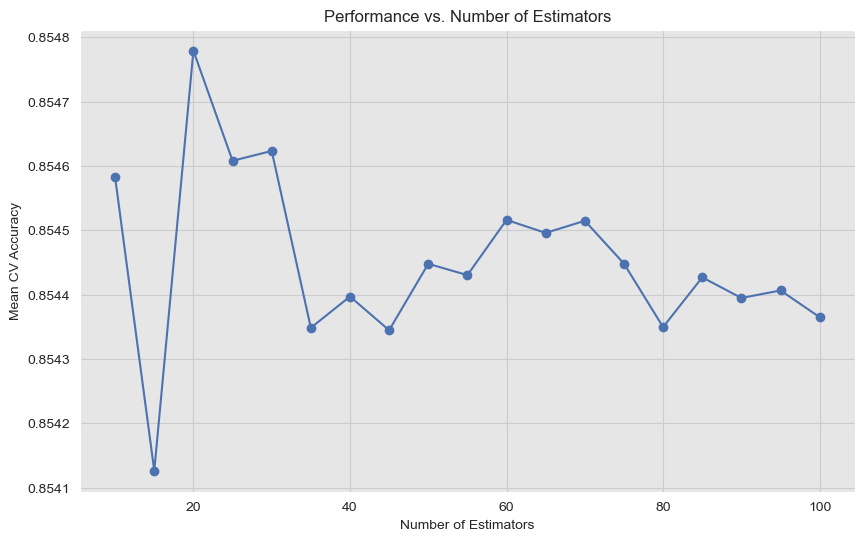

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score
# Define a range of n_estimators values to try
estimator_range = range(10, 101, 5)

# Initialize an empty list to store cross-validation scores
cv_scores = []

# Perform cross-validation for each value of n_estimators
for estimator in estimator_range:
    ada_boost = AdaBoostClassifier(n_estimators=estimator, random_state=42)
    scores = cross_val_score(ada_boost, X_train, y_train, cv=NUM_FOLDS, scoring='f1_weighted')
    # print("Scores:", scores)
    cv_scores.append(scores.mean())

# Plot the performance curve
plt.figure(figsize=(10, 6))
plt.plot(estimator_range, cv_scores, marker='o', linestyle='-')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean CV Accuracy')
plt.title('Performance vs. Number of Estimators')
plt.grid(True)
plt.show()
plt.savefig(f'../images/Adaboost/number_estimators_effect.png', dpi=300, bbox_inches='tight')


In [44]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [10,20,60],
    'learning_rate': [0.1,1],
    'estimator': [LogisticRegression(random_state=42), None] #None is the default base estimator which is DecisionTreeClassifier
}


### Grid Search


Best parameters found: {'estimator': LogisticRegression(random_state=42), 'learning_rate': 1, 'n_estimators': 60}
Best score found: 0.8958166204383948
Test score with best parameters: 0.8932367613630314


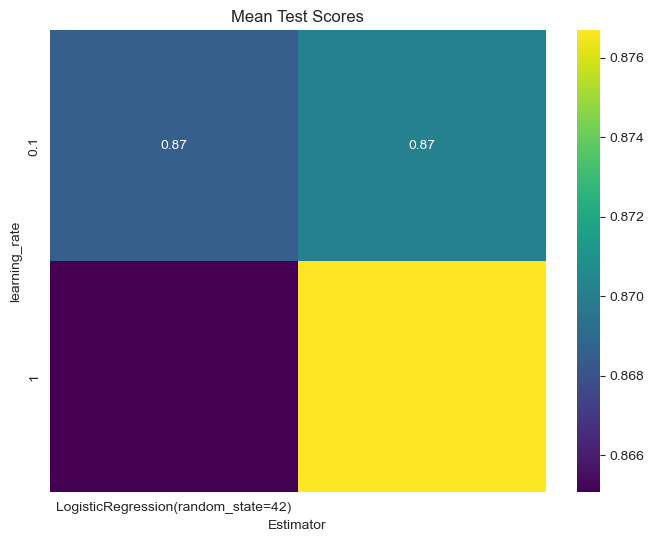

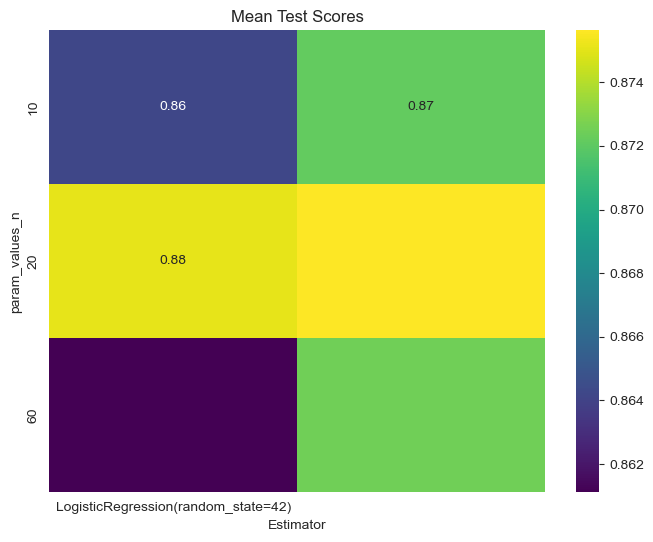

In [45]:
grid_search = get_grid_search(estimator=AdaBoostClassifier(
    random_state=42), param_grid=param_grid, X=X_train,y=y_train, cv=NUM_FOLDS, scoring='f1_weighted')
# Print the results
print("Best parameters found:", grid_search.best_params_)
print("Best score found:", grid_search.best_score_)
print("Test score with best parameters:", grid_search.score(X_test, y_test))
# Get the results
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']

# Prepare the hyperparameter values for plotting
param_values_n = param_grid['n_estimators']
param_values_lr = param_grid['learning_rate']
param_values_estimator = param_grid['estimator']

# Reshape the mean test scores for plotting
mean_test_scores = np.array(mean_test_scores).reshape(len(param_values_n), len(param_values_lr), len(param_values_estimator))

# Create a plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap of mean test scores
sns.heatmap(mean_test_scores.mean(axis=0), annot=True, cmap='viridis', xticklabels=param_values_estimator, yticklabels=param_values_lr)

# Set labels and title
plt.xlabel('Estimator')
plt.ylabel('learning_rate')
plt.title('Mean Test Scores')

# Show the plot
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap of mean test scores
sns.heatmap(mean_test_scores.mean(axis=1), annot=True, cmap='viridis', xticklabels=param_values_estimator, yticklabels=param_values_n)

# Set labels and title
plt.xlabel('Estimator')
plt.ylabel('param_values_n')
plt.title('Mean Test Scores')

# Show the plot
plt.show()


In [ ]:
#best parameters
model = AdaBoostClassifier()
# train the model
model.fit(X_train, y_train)

# predict the validation set
y_pred = model.predict(X_test)

# Accuracy Score
print("Accuracy Score of " + str(model) + " is: " + str(accuracy_score(y_test, y_pred)))

# Confusion Matrix
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

# Classification Report
print("Classification Report of " + str(model) + " is: \n" + str(classification_report(y_test, y_pred)))

# Weighted F1 Score
print("F1 Score of " + str(model) + " is: " + str(f1_score(y_test, y_pred, average='weighted')))
# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean training score
mean_training_score = cv_scores.mean()
print("Mean Training Score: {}".format(mean_training_score))

# Calculate the mean cross-validation score
mean_cv_score = cross_val_score(model, X_train, y_train, cv=NUM_FLODS, scoring='accuracy').mean()
print("Mean Cross-Validation Score: {}".format(mean_cv_score))
# Calculate the gap between mean training score and mean cross-validation score
gap = mean_training_score - mean_cv_score

print("Gap between mean training score and mean cross-validation score:", gap)
print("------------------------------------------------------")

### Heatmap


In [ ]:
plot_hyper_param_heat_maps(param_grid, grid_search,modelname='AdaBoost')

KeyError: 'estimate'

### Train-Validation Curve


In [ ]:
plot_hyper_param_train_validation_curve(estimator=AdaBoostClassifier(
    random_state=42), param_grid=param_grid,X=X_train, y=y_train, cv=NUM_FOLDS, scoring='f1_weighted', modelname='AdaBoost')

KeyboardInterrupt: 

## Bias-Variance Analysis


In [ ]:

adaboost = AdaBoostClassifier(n_estimators=20,learning_rate=1, random_state=42)

mse, bias, var = get_bias_variance(
    adaboost, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


In [ ]:
print("mse: ", mse)
print("bias: ", bias)
print("var: ", var)
print("Estimated Eout: ",bias + var)


mse:  0.102261875
bias:  0.10153780812499999
var:  0.0007240668749999996
Estimated Eout:  0.10226187499999999
